In [1]:
# Fix for common Windows compatibility issues
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# Debugging import issues: show interpreter, cwd, sys.path, and locate module file
import sys
from pathlib import Path

# The module lives one level up from this notebook; add that parent explicitly
module_parent = str(Path.cwd().parent)
if module_parent not in sys.path:
    sys.path.insert(0, module_parent)
    print('Inserted', module_parent, 'into sys.path')
else:
    print('Parent already on sys.path:', module_parent)

# Now import the module (will import from path printed above)
import stim_transformations as stf
import matplotlib.pyplot as plt
import cv2
import numpy as np

ref_path = './reference.png'
test0_path = './test0.png'
test1_path = './test1.png'

# Load images as grayscale
img_ref= cv2.imread(ref_path, cv2.IMREAD_GRAYSCALE)
img_test0 = cv2.imread(test0_path, cv2.IMREAD_GRAYSCALE)
img_test1 = cv2.imread(test1_path, cv2.IMREAD_GRAYSCALE)

Inserted /mnt/DataDrive3/emeyer/labcode/StimulusModeling into sys.path


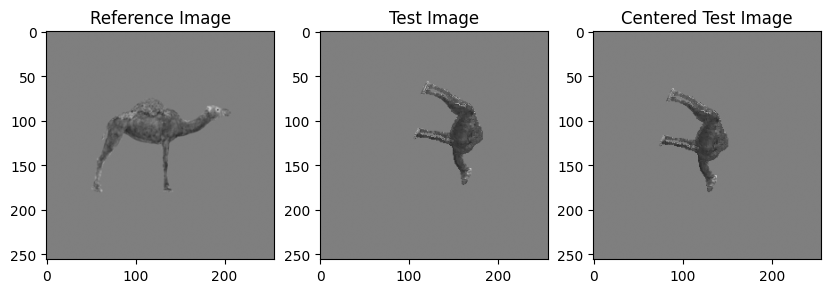

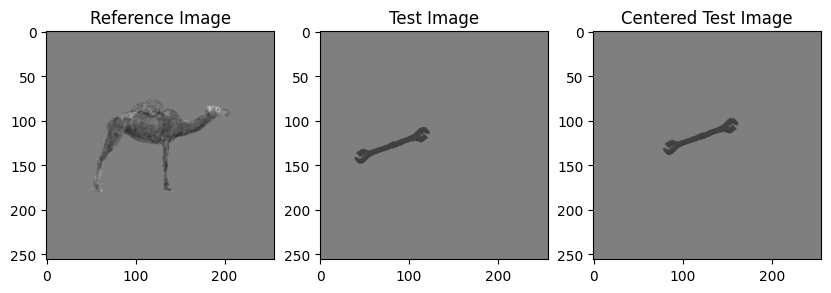

In [2]:
# Input reference and test images into the main function
out_img0 = stf.transform_image(img_test0, operation='center', img_ref = img_ref)
out_img1 = stf.transform_image(img_test1, operation='center', img_ref = img_ref)

# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_ref, cmap='gray', vmin = 0, vmax = 255)
plt.title('Reference Image')
plt.subplot(1, 3, 2)
plt.imshow(img_test0, cmap='gray', vmin = 0, vmax = 255)
plt.title('Test Image')
plt.subplot(1, 3, 3)
plt.imshow(out_img0, cmap='gray', vmin = 0, vmax = 255)
plt.title('Centered Test Image')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_ref, cmap='gray', vmin = 0, vmax = 255)
plt.title('Reference Image')
plt.subplot(1, 3, 2)
plt.imshow(img_test1, cmap='gray', vmin = 0, vmax = 255)
plt.title('Test Image')
plt.subplot(1, 3, 3)
plt.imshow(out_img1, cmap='gray', vmin = 0, vmax = 255)
plt.title('Centered Test Image')
plt.show()

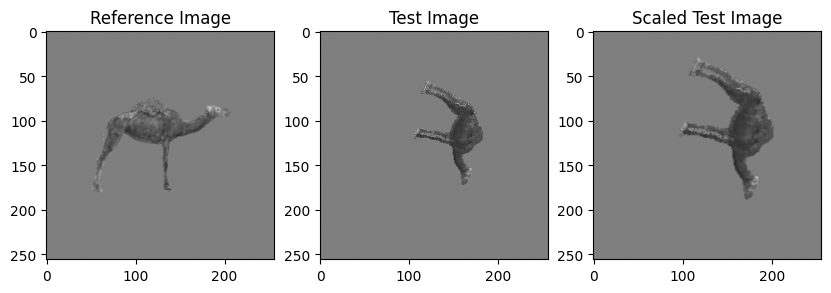

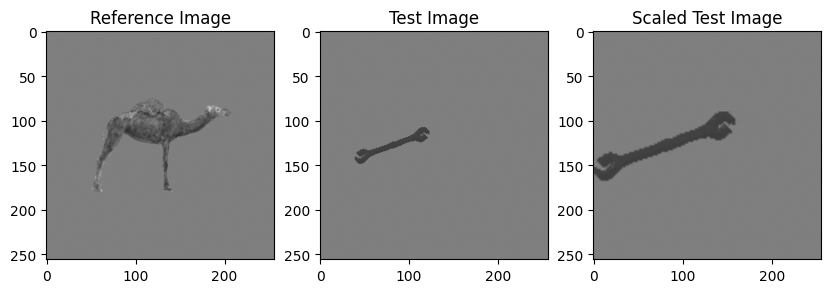

In [ ]:
out_img0 = stf.transform_image(img_test0, operation='scale', img_ref = img_ref)
out_img1 = stf.transform_image(img_test1, operation='scale', img_ref = img_ref)

# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_ref, cmap='gray', vmin = 0, vmax = 255)
plt.title('Reference Image')
plt.subplot(1, 3, 2)
plt.imshow(img_test0, cmap='gray', vmin = 0, vmax = 255)
plt.title('Test Image')
plt.subplot(1, 3, 3)
plt.imshow(out_img0, cmap='gray', vmin = 0, vmax = 255)
plt.title('Scaled Test Image')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_ref, cmap='gray', vmin = 0, vmax = 255)
plt.title('Reference Image')
plt.subplot(1, 3, 2)
plt.imshow(img_test1, cmap='gray', vmin = 0, vmax = 255)
plt.title('Test Image')
plt.subplot(1, 3, 3)
plt.imshow(out_img1, cmap='gray', vmin = 0, vmax = 255)
plt.title('Scaled Test Image')
plt.show()

Running on GPU!
Final crop: x=50, y=74, size=112x160, target=112x160
Image shape after processing: torch.Size([1, 1, 112, 160])


/home/arcarolab_adm/anaconda3/lib/python3.11/site-packages/plenoptic/tools/validate.py:343: UserWarning: Validating whether model can work with coarse-to-fine synthesis -- this can take a while!
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running on GPU!
Final crop: x=39, y=108, size=64x84, target=64x84
Image shape after processing: torch.Size([1, 1, 64, 84])


/home/arcarolab_adm/anaconda3/lib/python3.11/site-packages/plenoptic/synthesize/metamer.py:932: UserWarning: Loss has converged, stopping synthesis
  warnings.warn("Loss has converged, stopping synthesis")


  0%|          | 0/1500 [00:00<?, ?it/s]

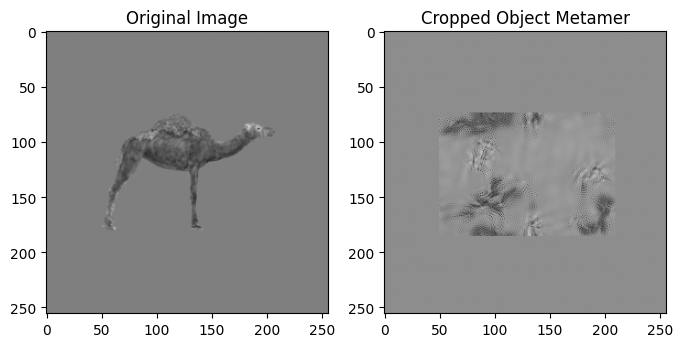

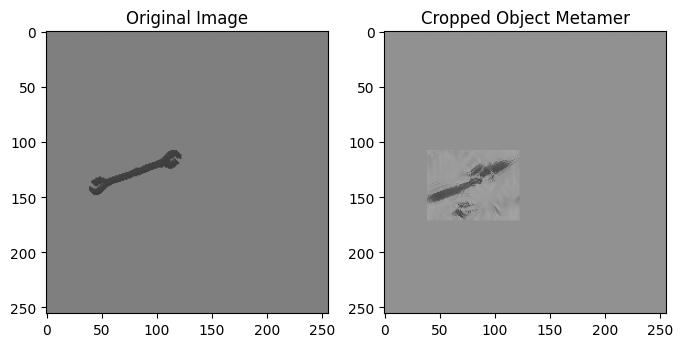

In [ ]:
# Currently outputting two images for texture, one full and one cropped
out_img_camel = stf.transform_image(img_ref, operation='texture_inplace')
out_img_wrench = stf.transform_image(img_test1, operation='texture_inplace')

# Visualize the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_ref, cmap='gray', vmin = 0, vmax = 255)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(out_img_camel, cmap='gray', vmin = 0, vmax = 255)
plt.title('Cropped Object Metamer')
plt.show()

# Visualize the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_test1, cmap='gray', vmin = 0, vmax = 255)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(out_img_wrench, cmap='gray', vmin = 0, vmax = 255)
plt.title('Cropped Object Metamer')
plt.show()

Running on GPU!


/home/arcarolab_adm/anaconda3/lib/python3.11/site-packages/plenoptic/tools/validate.py:343: UserWarning: Validating whether model can work with coarse-to-fine synthesis -- this can take a while!
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

/home/arcarolab_adm/anaconda3/lib/python3.11/site-packages/plenoptic/synthesize/metamer.py:932: UserWarning: Loss has converged, stopping synthesis
  warnings.warn("Loss has converged, stopping synthesis")


Running on GPU!


  0%|          | 0/1500 [00:00<?, ?it/s]

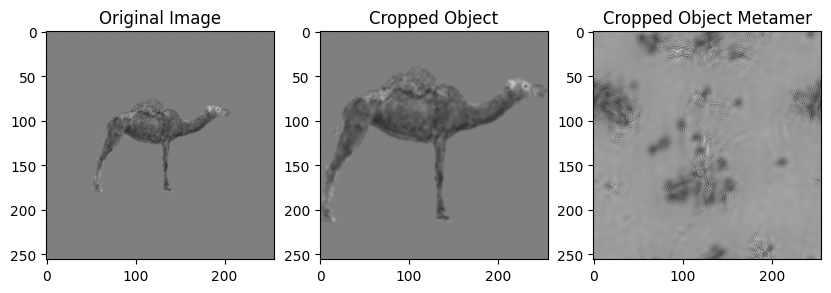

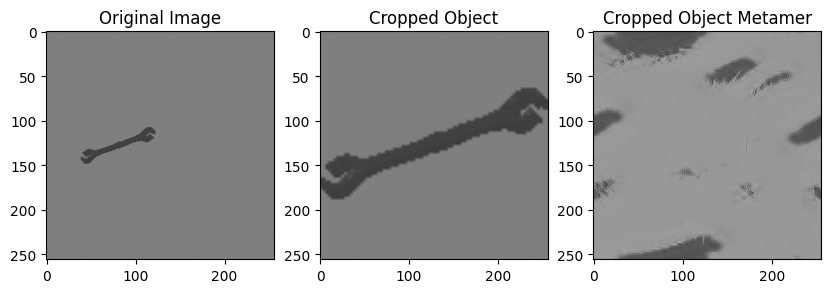

In [ ]:
# Creating bounding box for image based on largest h/w dimension then resizing to 256x256
camel_crop, texture_camel = stf.transform_image(img_ref, operation='texture_crop')
wrench_crop, texture_wrench = stf.transform_image(img_test1, operation='texture_crop')

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_ref, cmap='gray', vmin = 0, vmax = 255)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(camel_crop, cmap='gray', vmin = 0, vmax = 255)
plt.title('Cropped Object')
plt.subplot(1, 3, 3)
plt.imshow(texture_camel, cmap='gray', vmin = 0, vmax = 255)
plt.title('Cropped Object Metamer')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_test1, cmap='gray', vmin = 0, vmax = 255)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(wrench_crop, cmap='gray', vmin = 0, vmax = 255)
plt.title('Cropped Object')
plt.subplot(1, 3, 3)
plt.imshow(texture_wrench, cmap='gray', vmin = 0, vmax = 255)
plt.title('Cropped Object Metamer')
plt.show()


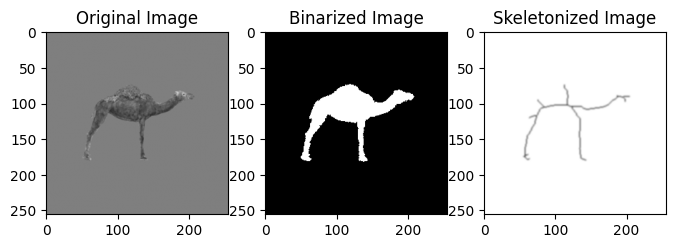

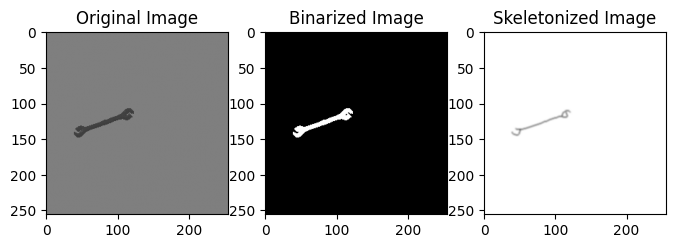

In [ ]:
binary, out_img = stf.transform_image(img_ref, operation='skeleton')
binary1, out_img1 = stf.transform_image(img_test1, operation='skeleton')

# Visualize the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_ref, cmap='gray', vmin = 0, vmax = 255)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(binary, cmap='gray', vmin = 0, vmax = 255)
plt.title('Binarized Image')
plt.subplot(1, 3, 3)
plt.imshow(out_img, cmap='gray', vmin = 0, vmax = 255)
plt.title('Skeletonized Image')
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_test1, cmap='gray', vmin = 0, vmax = 255)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(binary1, cmap='gray', vmin = 0, vmax = 255)
plt.title('Binarized Image')
plt.subplot(1, 3, 3)
plt.imshow(out_img1, cmap='gray', vmin = 0, vmax = 255)
plt.title('Skeletonized Image')
plt.show()

In [4]:
features = stf.transform_image(img_ref, operation='NN', network='alexnet_mouse', layer_types=['Conv2d', 'Linear'], device='auto')

Loading alexnet_bn_ir_64x64_input_pool_6. Pretrained: True. Model Family: imagenet.
Loaded parameters from ../mouse_vision/model_ckpts/alexnet_bn_ir.pt
